In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

from bruit_schiolerSilverman import silverman
from bruit_schiolerSilverman import jeuDeDonnees_silverman_bruite
from bruit_schiolerSilverman import affichage_illustratif_silverman

from bruit_schiolerSilverman import decoupageEnDeuxSousEnsembles
from bruit_schiolerSilverman import affichage_ensembles

from learning_schiolerSilverman import affichage_reseau_et_donnees
from learning_schiolerSilverman import apprentissage
from learning_schiolerSilverman import affichage_performances_et_donnees
from learning_schiolerSilverman import affiche_rms

# Régression par Perceptron Multicouches (Notions)
***

## Les données simulées "silverman"

Dans cette partie nous afficsons le jeu de données simulées.

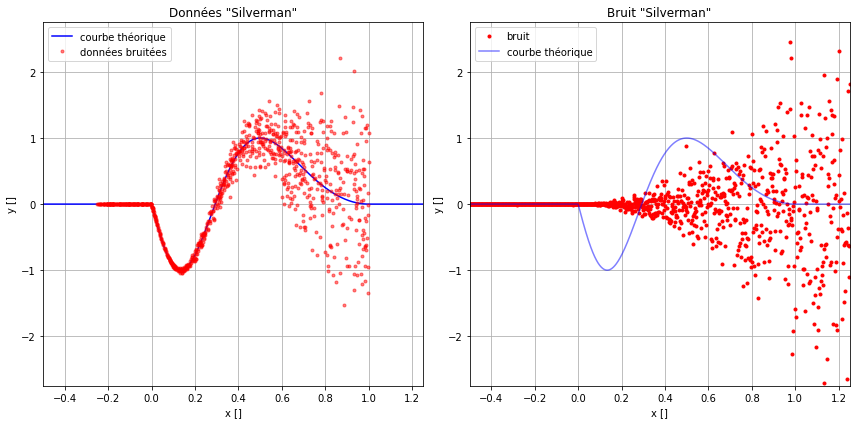

In [2]:
plt.figure(figsize=(12,6))
affichage_illustratif_silverman()

Nous allons maintenant générer les différents ensembles nécessaires à l'apprentissage.

In [3]:
#np.random.seed(4);    # (Re)positionnement du random (ou pas)

In [4]:
nombreDeDonnees_appVal = 1000
nombreDeDonnees_test = 500
r_l=0.2 # proportion de l'ensemble d'apprentissage 

# generation du jeu de donnees aleatoires
a1=-2 ; b1=-.75 ; a2=-.25 ; b2=1; a3=None; b3=None
xi,yi = jeuDeDonnees_silverman_bruite(nombreDeDonnees_appVal,sigma=1)

# decoupage en deux ensembles d'apprentissage et de validation
x_app, y_app, x_val, y_val = decoupageEnDeuxSousEnsembles(xi,yi,r_l)
n_app = np.size(x_app,0)
n_val = np.size(x_val,0)

In [5]:
silverman_bruite??

Object `silverman_bruite` not found.


On a, par ailleurs, un **ensemble de test** .

In [6]:
# ensemble de test (performances en generalisation une fois l'apprentissage termine)
x_test,y_test = jeuDeDonnees_silverman_bruite(nombreDeDonnees_test,sigma=1)
n_test = np.size(x_test,0)

quelques lignes de commandes fonctionnelles

In [7]:
# mise en forme pour MLPRegressor 
x_app = np.reshape(x_app, [n_app, 1])
x_val = np.reshape(x_val, [n_val, 1])
x_test = np.reshape(x_test, [n_test, 1])    

#### Affichage du jeu de données

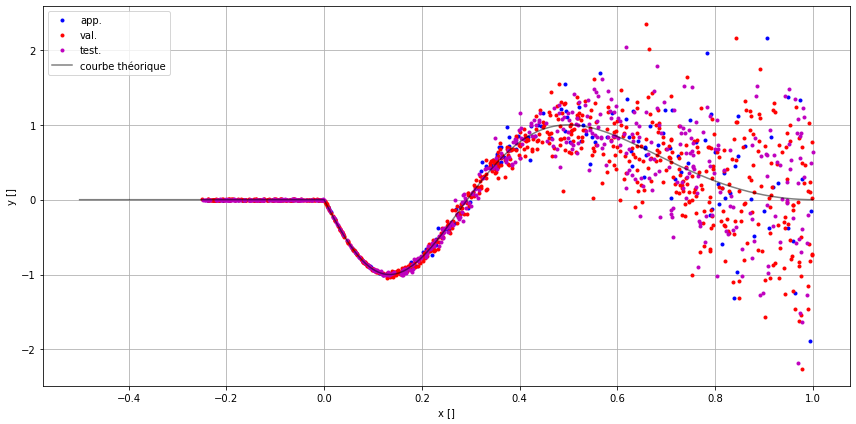

In [8]:
# Abscisse régulière pour l'affichage des courbes
n_maillage = 1000
x_maillage = np.linspace(-2,2,n_maillage).reshape(n_maillage,1) 

plt.figure(figsize=(12,6))
affichage_ensembles(x_app, y_app, x_val, y_val, x_test, y_test,silverman)

## Apprentissage i.e. estimation d'une fonction par MLP

### apprentissage d'un mlp

In [9]:
# Apprentissage pour un nombre de neurones en couche cachée
n_hidden = 3
# specification du modele
rgrsr = MLPRegressor(activation='tanh', hidden_layer_sizes = (n_hidden), warm_start='True',solver='lbfgs', learning_rate = 'adaptive',max_iter=1)

# apprentissage du modele
rgrsr, erreurs_app, erreurs_val, cpt_erreur_val_min = apprentissage(rgrsr,x_app, y_app,x_val, y_val,max_n_iter=500)

#### affichage des performances de l'apprentissage 

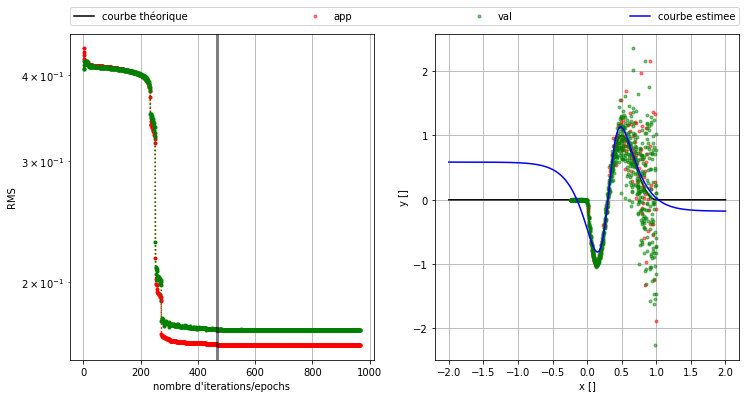

In [10]:
fig= plt.figure(figsize=(12,6))
affichage_performances_et_donnees(erreurs_app,erreurs_val,cpt_erreur_val_min,
                                  n_hidden,rgrsr,
                                  x_app,y_app,x_val,y_val,
                                  silverman,x_maillage)

In [11]:
affiche_rms(n_hidden,erreurs_app,erreurs_val,cpt_erreur_val_min)
print()

       m  err_app  err_val
       3  0.16222  0.17001



Bien qu'on ne le devrait pas, on va considérer l'ensemble de test et les performances associées.  
Cela devrait nous permettre de prendre du recul sur l'effet des paramètres d'apprentissage sur la généralisation. 

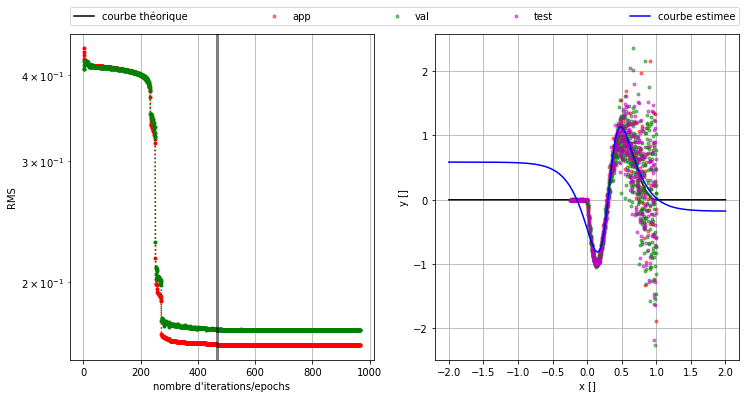

In [12]:
fig= plt.figure(figsize=(12,6))
affichage_performances_et_donnees(erreurs_app,erreurs_val,cpt_erreur_val_min,
                                  n_hidden,rgrsr,
                                  x_app,y_app,x_val,y_val,
                                  silverman,x_maillage,
                                  x_test, y_test)

In [13]:
affiche_rms(n_hidden,erreurs_app,erreurs_val,cpt_erreur_val_min,x_test=x_test,y_test=y_test,rgrsr=rgrsr)
print() 

       m  err_app  err_val      err_test
       3  0.16222  0.17001     (0.17409)



### apprentissage de plusieurs architectures

In [14]:
# Apprentissage pour un nombre de neurones en couche cachée
liste_n_hidden = list(range(1,10,2))

# initialisation
liste_rgrsr         = list()
liste_erreurs_app = list()
liste_erreurs_val = list()
liste_cpt_erreur_val_min  = list()

# specification du modele
for i,n_hidden in enumerate(liste_n_hidden): 
    rgrsr = MLPRegressor(activation='tanh', hidden_layer_sizes = (n_hidden), warm_start='True',solver='lbfgs', learning_rate = 'adaptive',max_iter=1)

    # apprentissage du modele
    rgrsr, erreurs_app, erreurs_val, cpt_erreur_val_min = apprentissage(rgrsr,x_app, y_app,x_val, y_val,max_n_iter=500)
    liste_rgrsr.append(rgrsr)
    liste_erreurs_app.append(erreurs_app)
    liste_erreurs_val.append(erreurs_val)
    liste_cpt_erreur_val_min.append(cpt_erreur_val_min)

#### affichage des performances  d'apprentissage

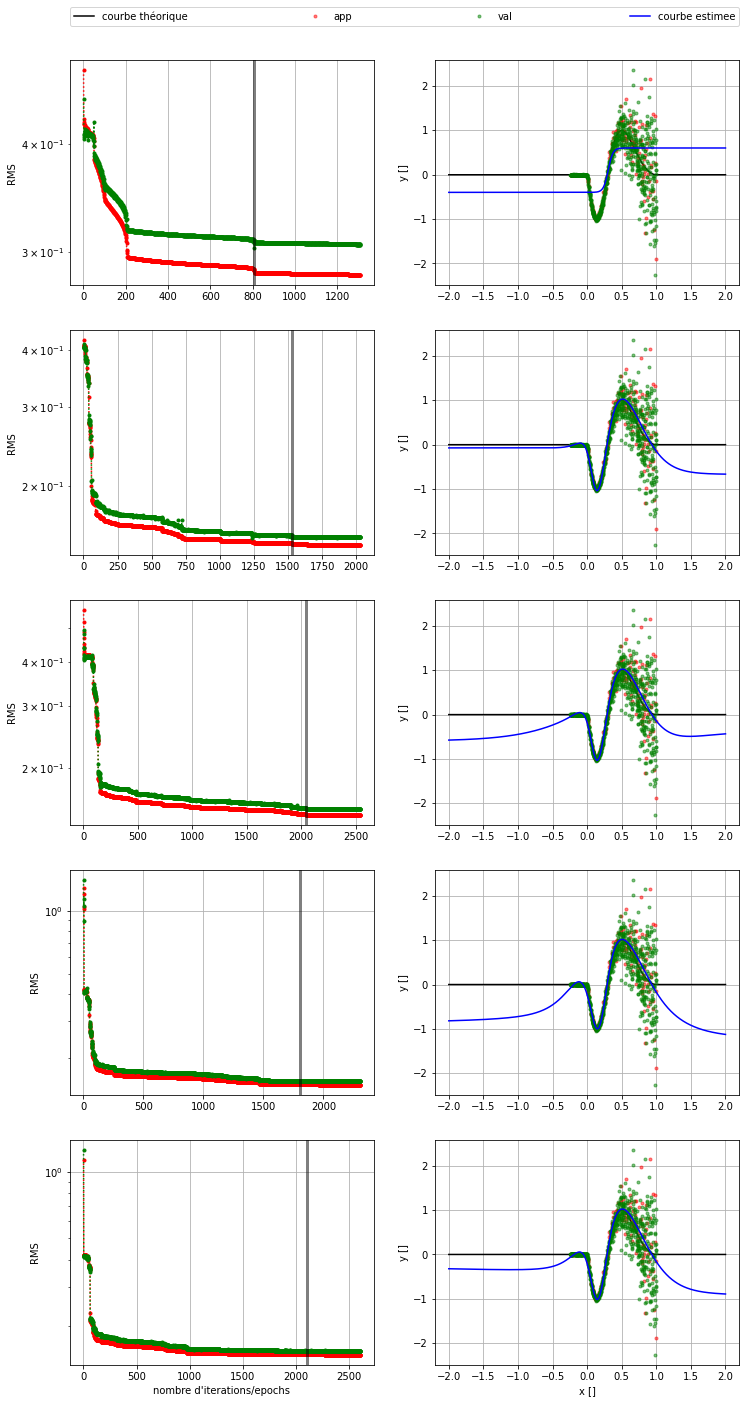

In [15]:
fig= plt.figure(figsize=(12,24))
affichage_performances_et_donnees(liste_erreurs_app,liste_erreurs_val,
                                  liste_cpt_erreur_val_min,
                                  liste_n_hidden,liste_rgrsr,
                                  x_app,y_app,x_val,y_val,
                                  silverman,x_maillage)
    

In [16]:
    affiche_rms(liste_n_hidden,liste_erreurs_app,liste_erreurs_val,liste_cpt_erreur_val_min)
    print()
    

       m  err_app  err_val
       1  0.28581  0.30337
       3  0.14831  0.15267
       5  0.14847  0.15322
       7  0.14891  0.15414
       9  0.14852  0.15368



Comme précédemment on va considérer l'ensemble de test et les performances associées.  
Là encore, bien qu'on ne le devrait pas, cela devrait nous permettre de prendre du recul sur l'effet des paramètres d'apprentissage sur la généralisation. 

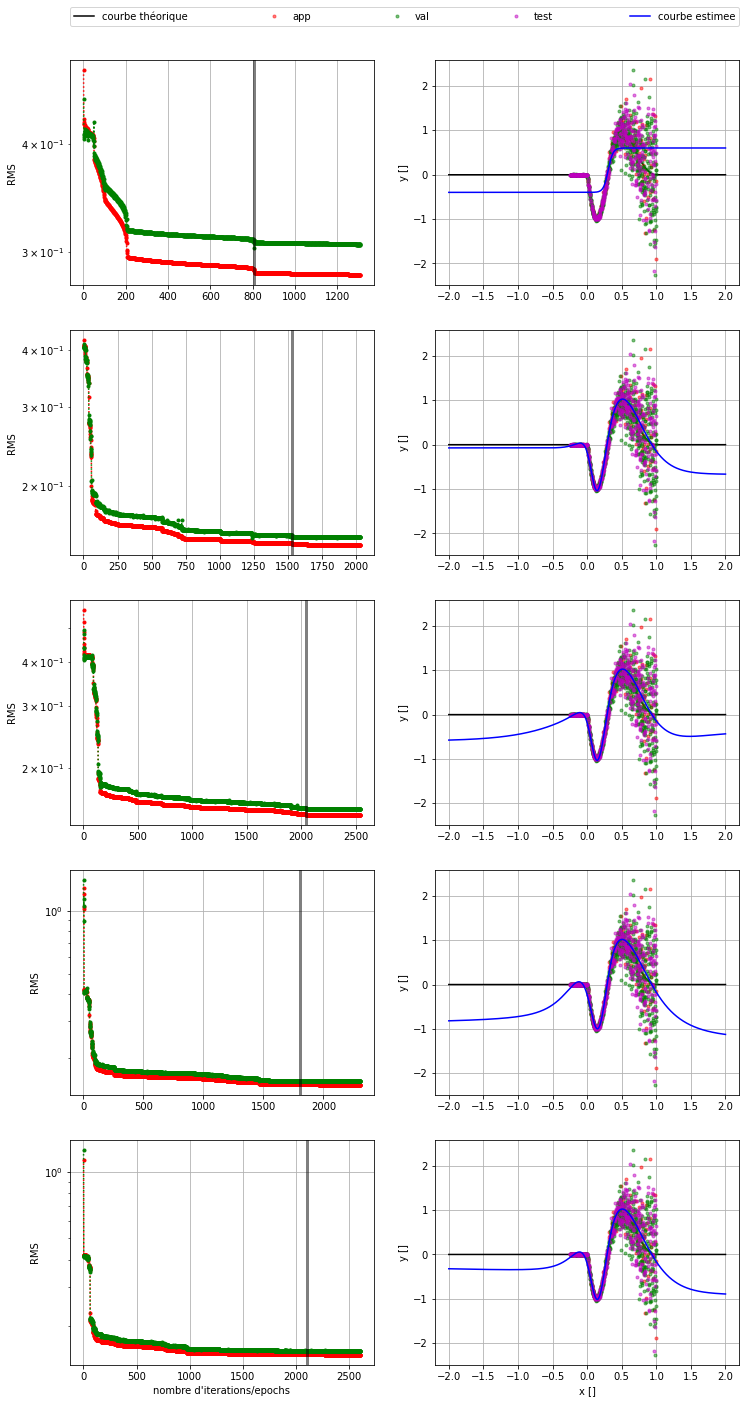

In [17]:
fig= plt.figure(figsize=(12,24))
affichage_performances_et_donnees(liste_erreurs_app,liste_erreurs_val,
                                  liste_cpt_erreur_val_min,
                                  liste_n_hidden,liste_rgrsr,
                                  x_app,y_app,x_val,y_val,
                                  silverman,x_maillage,
                                  x_test, y_test)

In [18]:
affiche_rms(liste_n_hidden,liste_erreurs_app,liste_erreurs_val,liste_cpt_erreur_val_min,x_test=x_test,y_test=y_test,rgrsr=liste_rgrsr)
print()

       m  err_app  err_val      err_test
       1  0.28581  0.30337     (0.29514)
       3  0.14831  0.15267     (0.16312)
       5  0.14847  0.15322     (0.16325)
       7  0.14891  0.15414     (0.16471)
       9  0.14852  0.15368     (0.16395)



In [19]:
#On prend 5

In [20]:
moy_app=rgrsr.predict(x_app)
moy_val = rgrsr.predict(x_val)
moy_test = rgrsr.predict(x_test)
variance_app = (y_app-moy_app)**2
variance_val = (y_val-moy_val)**2
variance_test = (y_test-moy_test)**2

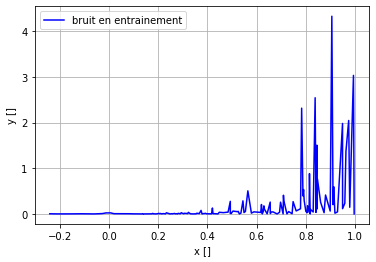

In [21]:
ax = plt.gca()
#ax.plot(x_maillage,sumz,'k-',label='courbe théorique')
#ax.plot(x_app,y_app,'r.',alpha=.5,label='app')
#ax.plot(x_val,y_val,'g.',alpha=.5,label='val')

# courbe estimee
ax.plot(x_app,variance_app,'b-',label='bruit en entrainement')
ax.grid(True)
ax.set_xlabel("x []")
ax.set_ylabel("y []")
ax.legend()

In [22]:
from scipy.stats import norm
def bruit_gaussien_nonstationnaire(x,mu=0,sigma=1):
    ''' bruit qui suit une distribution normale N(0 ; sigma(x)**2), avec
         avec la variance sigma(x)**2   =  0.0025   si x <= 0.05
                                        =  x**2     si x >  0.05'''
    if not isinstance(x,(int,float,np.ndarray)):
        raise NotImplementedError("Voir si cela est gerable")
    sigma = sigma * (x*(x>.05) + .05*(x<=.05))
    return norm.rvs(mu,sigma**2)

In [23]:
x_maillage = np.linspace(-0.25,1,n_maillage).reshape(n_maillage,1) 

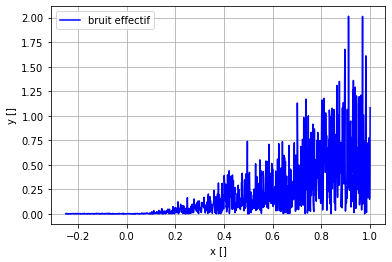

In [24]:
ax = plt.gca()
#ax.plot(x_maillage,sumz,'k-',label='courbe théorique')
#ax.plot(x_app,y_app,'r.',alpha=.5,label='app')
#ax.plot(x_val,y_val,'g.',alpha=.5,label='val')

# courbe estimee
ax.plot(x_maillage,abs(bruit_gaussien_nonstationnaire(x_maillage)),'b-',label='bruit effectif')
ax.grid(True)
ax.set_xlabel("x []")
ax.set_ylabel("y []")
ax.legend()

In [25]:
# Apprentissage pour un nombre de neurones en couche cachée
liste_n_hidden = list(range(1,15,1))

# initialisation
liste_rgrsr2         = list()
liste_erreurs_app = list()
liste_erreurs_val = list()
liste_cpt_erreur_val_min  = list()

# specification du modele
for i,n_hidden in enumerate(liste_n_hidden): 
    rgrsr2 = MLPRegressor(activation='tanh', hidden_layer_sizes = (n_hidden), warm_start='True',solver='lbfgs', learning_rate = 'adaptive',max_iter=1)

    # apprentissage du modele
    rgrsr2, erreurs_app, erreurs_val, cpt_erreur_val_min = apprentissage(rgrsr2,x_app, variance_app,x_val, variance_val,max_n_iter=500)
    liste_rgrsr2.append(rgrsr2)
    liste_erreurs_app.append(erreurs_app)
    liste_erreurs_val.append(erreurs_val)
    liste_cpt_erreur_val_min.append(cpt_erreur_val_min)

In [26]:
affiche_rms(n_hidden,erreurs_app,erreurs_val,cpt_erreur_val_min)


       m  err_app  err_val
      14  0.18676  0.11910


In [27]:
affiche_rms(liste_n_hidden,liste_erreurs_app,liste_erreurs_val,liste_cpt_erreur_val_min,x_test=x_test,y_test=variance_test,rgrsr=liste_rgrsr2)
print()

       m  err_app  err_val      err_test
       1  0.18750  0.12032     (0.12102)
       2  0.19137  0.11982     (0.12113)
       3  0.19430  0.11964     (0.12121)
       4  0.19169  0.11967     (0.12100)
       5  0.19317  0.11990     (0.12096)
       6  0.18846  0.11961     (0.12062)
       7  0.18729  0.11945     (0.12119)
       8  0.18698  0.11898     (0.12031)
       9  0.18996  0.11945     (0.12090)
      10  0.18980  0.12006     (0.12111)
      11  0.19064  0.11928     (0.12080)
      12  0.18593  0.11972     (0.12057)
      13  0.19105  0.11980     (0.12078)
      14  0.18676  0.11910     (0.12037)



In [28]:
# Apprentissage pour un nombre de neurones en couche cachée
n_hidden = 3
# specification du modele
rgrsr2 = MLPRegressor(activation='tanh', hidden_layer_sizes = (n_hidden), warm_start='True',solver='lbfgs', learning_rate = 'adaptive',max_iter=100)

# apprentissage du modele
rgrsr2, erreurs_app, erreurs_val, cpt_erreur_val_min = apprentissage(rgrsr2,x_app, variance_app,x_val, variance_val,max_n_iter=500)

In [29]:
affiche_rms(n_hidden,erreurs_app,erreurs_val,cpt_erreur_val_min)
print()

       m  err_app  err_val
       3  0.18054  0.12828



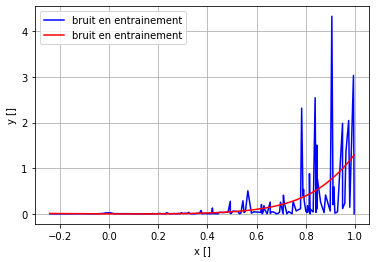

In [30]:
ax = plt.gca()
#ax.plot(x_maillage,sumz,'k-',label='courbe théorique')
#ax.plot(x_app,y_app,'r.',alpha=.5,label='app')
#ax.plot(x_val,y_val,'g.',alpha=.5,label='val')

# courbe estimee
ax.plot(x_app,variance_app,'b-',label='bruit en entrainement')
ax.plot(x_app,rgrsr2.predict(x_app),'r-',label='bruit en entrainement')
#ax.plot(x_app,rgrsr2.predict(x_app),'r-',label='bruit en entrainement')
ax.grid(True)
ax.set_xlabel("x []")
ax.set_ylabel("y []")
ax.legend()

/home/moumene/.conda/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
/home/moumene/.conda/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


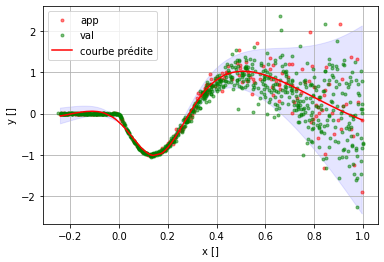

In [31]:
ax = plt.gca()
#ax.plot(x_maillage,sumz,'k-',label='courbe théorique')
ax.plot(x_app,y_app,'r.',alpha=.5,label='app')
ax.plot(x_val,y_val,'g.',alpha=.5,label='val')

# courbe estimee
#ax.plot(x_app,variance_app,'b-',label='bruit en entrainement')
ax.plot(x_app,rgrsr.predict(x_app),'r-',label='courbe prédite')
#ax.plot(x_app,rgrsr2.predict(x_app),'r-',label='bruit en entrainement')
ax.grid(True)
ax.set_xlabel("x []")
ax.set_ylabel("y []")

ax.fill_between(x_app.reshape(-1), rgrsr.predict(x_app)+2*np.sqrt(rgrsr2.predict(x_app)), rgrsr.predict(x_app)-2*np.sqrt(rgrsr2.predict(x_app)), color='b', alpha=.1)
ax.legend()

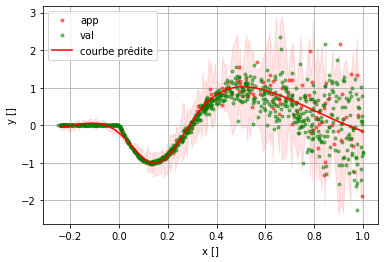

In [32]:
ax = plt.gca()
#ax.plot(x_maillage,sumz,'k-',label='courbe théorique')
ax.plot(x_app,y_app,'r.',alpha=.5,label='app')
ax.plot(x_val,y_val,'g.',alpha=.5,label='val')

# courbe estimee
#ax.plot(x_app,variance_app,'b-',label='bruit en entrainement')
ax.plot(x_app,rgrsr.predict(x_app),'r-',label='courbe prédite')
#ax.plot(x_app,rgrsr2.predict(x_app),'r-',label='bruit en entrainement')
ax.grid(True)
ax.set_xlabel("x []")
ax.set_ylabel("y []")
ax.fill_between(x_app.reshape(-1), rgrsr.predict(x_app)+2*np.sqrt(abs(bruit_gaussien_nonstationnaire(x_app))).reshape(-1),rgrsr.predict(x_app)-2*np.sqrt(abs(bruit_gaussien_nonstationnaire(x_app))).reshape(-1), color='r', alpha=.1)
ax.legend()

In [33]:
count=0
for i,x in enumerate(x_val):
    if rgrsr.predict(np.vstack(([x])))-2*np.sqrt(rgrsr2.predict(np.vstack(([x])))) <= y_val[i] <= rgrsr.predict(np.vstack(([x])))+2*np.sqrt(rgrsr2.predict(np.vstack(([x])))):
        count=count+1

/home/moumene/.conda/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/home/moumene/.conda/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/home/moumene/.conda/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/home/moumene/.conda/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/home/moumene/.conda/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is se

In [34]:
count/len(y_val)

0.75375